In [2]:
pip install FinQuant

     |████████████████████████████████| 61kB 367kB/s eta 0:00:01
  Stored in directory: /Users/sumitkumarbehal/Library/Caches/pip/wheels/19/2a/e6/b4d4cc977576e18220a36866acf2f2cf7241f16af5f8795b17
  Stored in directory: /Users/sumitkumarbehal/Library/Caches/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
  Stored in directory: /Users/sumitkumarbehal/Library/Caches/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built yfinance multitasking inflection
  Found existing installation: more-itertools 7.0.0
    Uninstalling more-itertools-7.0.0:
      Successfully uninstalled more-itertools-7.0.0
Note: you may need to restart the kernel to use updated packages.


# PORTFOLIO ANALYSIS

In this notebook, we will be picking the best 3 stocks out of 6 stocks based on 2 portfolios focussed on IT and OIL Sector.

# IT PORTFOLIO 

My Portfolio consists on three stocks. All three are bluechips.

 # Google 
 
It is also referred to as Google Web Search, is a web search engine developed by Google. It is the most used search engine on the World Wide Web across all platforms, with 92.62% market share as of June 2019, handling more than 5.4 billion searches each day.

# Amazon

Amazon.com, Inc., is an American multinational technology company based in Seattle that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. 

# Facebook

Facebook is an American online social media and social networking service based in Menlo Park, California and a flagship service of the namesake company Facebook, Inc.

In [1]:
from finquant.portfolio import build_portfolio
names = ['GOOG', 'AMZN', 'FB']
start_date = '2015-01-01'
end_date = '2019-12-03'
it_portfolio = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date)

# OIL PORTFOLIO
 
This portfolio consists of 3 top notch companies which are being traded in New York Stock Exchange.

# Chevron Corporation

Chevron Corporation is an American multinational energy corporation. One of the successor companies of Standard Oil, it is headquartered in San Ramon, California, and active in more than 180 countries.

# ExxonMobil

Exxon Mobil Corporation, doing business as ExxonMobil, is an American multinational oil and gas corporation headquartered in Irving, Texas. It is the largest direct descendant of John D. Rockefeller's Standard Oil, and was formed on November 30, 1999 by the merger of Exxon and Mobil.

# Occidental Petroleum

Occidental Petroleum Corporation is an American company engaged in hydrocarbon exploration in the United States, the Middle East, and Colombia as well as petrochemical manufacturing in the United States, Canada, and Chile. It is organized in Delaware and headquartered in Houston.

In [2]:
names = ['CVX', 'XOM', 'OXY']
start_date = '2015-01-01'
end_date = '2019-12-03'
oil_portfolio = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date)

In [3]:
it_portfolio.properties()

----------------------------------------------------------------------
Stocks: GOOG, AMZN, FB
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.332
Portfolio Volatility: 0.218
Portfolio Sharpe Ratio: 1.499

Skewness:
       GOOG      AMZN        FB
0  0.306267  0.703598  0.327239

Kurtosis:
       GOOG      AMZN        FB
0 -0.630864  0.283908 -1.039212

Information:
   Allocation  Name
0    0.333333  GOOG
1    0.333333  AMZN
2    0.333333    FB
----------------------------------------------------------------------


In [4]:
oil_portfolio.properties()

----------------------------------------------------------------------
Stocks: CVX, XOM, OXY
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.016
Portfolio Volatility: 0.197
Portfolio Sharpe Ratio: 0.057

Skewness:
        CVX       XOM       OXY
0 -0.050995 -0.536216 -0.090799

Kurtosis:
        CVX       XOM       OXY
0 -0.360563  0.260976 -0.823033

Information:
   Allocation Name
0    0.333333  CVX
1    0.333333  XOM
2    0.333333  OXY
----------------------------------------------------------------------


# Terminology


Let's look at the properties of IT portfolio and Oil portfolios.


## Sharpe Ratio
Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers.

## Volatility 
Volatility is a formal measure of a stock's risks. The higher the volatility of a stock, the greater its up and down swings. The volatility of a portfolio of stocks, on the other hand, is a measure of how wildly the total value of all the stocks in that portfolio appreciates or declines.

# Skewness 
Skewness can either be negative or positive. A stock with negative skewness is one that generates frequent small gains and few extreme or significant losses in the time period considered. On the other hand, a stock with positive skewness is one that generates frequent small losses and few extreme gains.




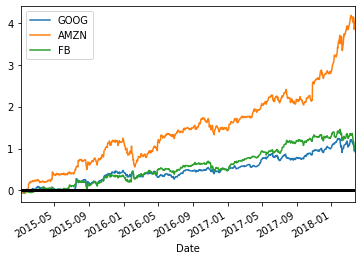

In [12]:
it_portfolio.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

Portfolio expected return comes out to be 0.332 with volatility of 0.218. Amazon is clearly outperforming the other competitor. Facebook and Google showing almost same trends as they are following the trend of NASDAQ. Skewness of AMZN is definitely showing that it has tendency to show good breakouts. This is definitey one of the three stocks which we will be picking!

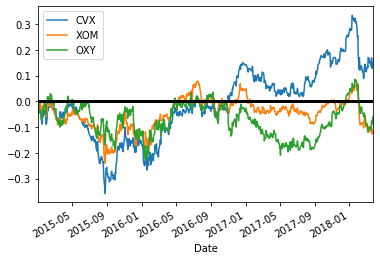

In [5]:
oil_portfolio.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

Portfolio expected return comes out to be 0.016 with volatility of 0.197. Return is bit low here and we need to pick the best stock from them. CVX is showing good result in comparison to XOM and OXY. 

In [36]:
names = ['GOOG', 'AMZN', 'FB','CVX','OXY','XOM']
start_date = '2015-01-01'
end_date = '2019-12-03'
mixed_portfolio = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date)

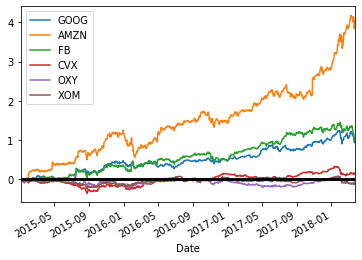

In [37]:
mixed_portfolio.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

# PICK 1 : AMAZON

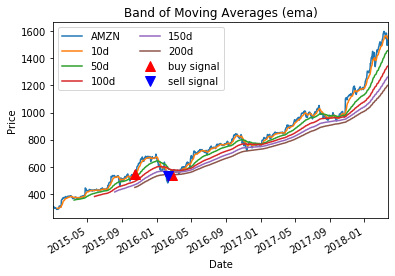

In [11]:
from finquant.moving_average import compute_ma, ema,sma
dis = it_portfolio.get_stock("AMZN").data.copy(deep=True)
spans = [ 10,50,100,150, 200]
ma = compute_ma(dis, ema, spans, plot=True)

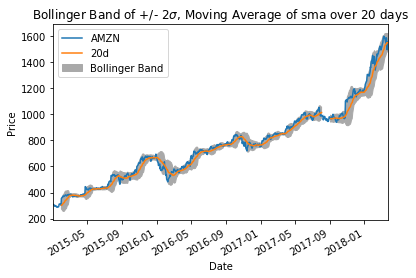

In [16]:
from finquant.moving_average import plot_bollinger_band
dis = it_portfolio.get_stock("AMZN").data.copy(deep=True)
span=20
plot_bollinger_band(dis, sma, span)

Amazon will be our first pick. Stock is in uptrend. All smaller moving averages are above 200DMA. This gives us a good support at any point even if market falls. This clearly gives a good structure over chart. It is in clear uptrend. This is one of the bluechip stock in this series. 

# PICK 2 : Chevron Corporation

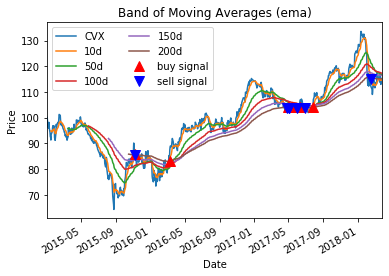

In [18]:
dis = oil_portfolio.get_stock("CVX").data.copy(deep=True)
spans = [ 10,50,100,150, 200]
ma = compute_ma(dis, ema, spans, plot=True)

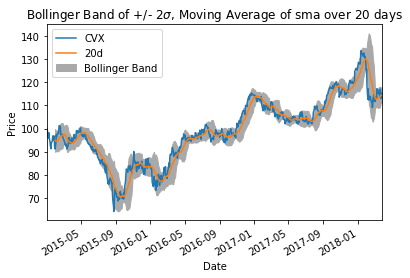

In [20]:
from finquant.moving_average import plot_bollinger_band
dis = oil_portfolio.get_stock("CVX").data.copy(deep=True)
span=20
plot_bollinger_band(dis, sma, span)

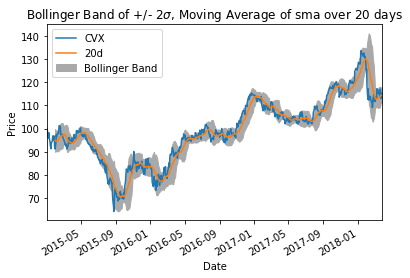

In [15]:
from finquant.moving_average import plot_bollinger_band
dis = oil_portfolio.get_stock("CVX").data.copy(deep=True)
span=20
plot_bollinger_band(dis, sma, span)

Chevron Corporation is chosen here to chose to diversify the portfolios. It is only proven stock in the oil sector.Crude Oil dominates the major trend in this sector. One must look for this fundamental aspect in building a portfolio.

 # PICK 3 : GOOGLE
 
 This is more of a fundamental pick. Google, Facebook are definitely better than oil companies. I choosed Google over Facebook as Google business seems better than Facebook.  Facebook's top management got dinged for its handling of data security and privacy. One can't help but conclude that they've overemphasized making a buck at the expense of adequately safeguarding their users' data. This gives me more confidence on Google top management layer. 
 

# FINAL PORTFOLIO

1. AMAZON
2. GOOGLE 
3. Chevron Corporation


# REVIEW ON PORTFOLIO
 
 This portfolio is diversed in IT and Oil sector. I've chosen Chevron Corporation to diversify the model. This pick is based on Saudi Aramco IPO. This IPO is largest till date and this will probably boost the whole sector. CVX seems a relevant pick here.

In [21]:
names = ['GOOG', 'AMZN', 'CVX']
start_date = '2015-01-01'
end_date = '2019-12-03'
final_portfolio = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date)

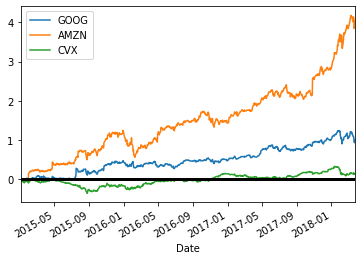

In [22]:
final_portfolio.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)